<a href="https://colab.research.google.com/github/rxi-prakharvrm/Machine-Learning/blob/main/handwritten_number_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [ ]:
print(f"X_train = {X_train.shape}")
print(f"X_test = {X_test.shape}")
print(f"Y_train = {Y_train.shape}")
print(f"Y_test = {Y_test.shape}")

In [ ]:
X_train[3]

In [ ]:
plt.matshow(X_train[3])

In [ ]:
Y_train[:5]

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28 * 28) / 255
X_test_flattened = X_test.reshape(len(X_test), 28 * 28) / 255

In [ ]:
print(f"X_train_flattened = {X_train_flattened.shape}")
print(f"X_test_flattened = {X_test_flattened.shape}")

In [ ]:
X_train_flattened[0]

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(250, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5143 - accuracy: 0.8737
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3036 - accuracy: 0.9151
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2830 - accuracy: 0.9210
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2730 - accuracy: 0.9242
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2666 - accuracy: 0.9255
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2617 - accuracy: 0.9267
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2576 - accuracy: 0.9284
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2553 - accuracy: 0.9290
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2529 - accuracy: 0.9299
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 

In [ ]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0934 - accuracy: 0.9771


[0.09343511611223221, 0.9771000146865845]

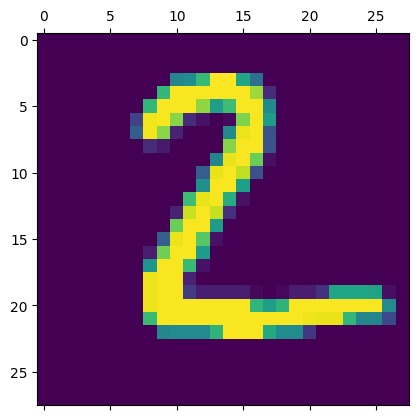

In [ ]:
plt.matshow(X_test[1])

In [ ]:
Y_predicted = model.predict(X_test_flattened)
Y_predicted[1]

313/313 [==============================] - 1s 2ms/step


array([2.6084259e-05, 4.0839893e-01, 1.0000000e+00, 2.7085389e-03,
       6.1364576e-14, 9.3717489e-04, 5.3322583e-04, 1.5250971e-15,
       4.1366020e-01, 1.2665113e-13], dtype=float32)

In [ ]:
np.argmax(Y_predicted[1])

2

In [ ]:
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
Y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
Y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [ ]:
cm = tf.math.confusion_matrix(labels=Y_test, predictions=Y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    1,    0,    1,    1,    1,    3,    0,    3,    1],
       [   0, 1122,    3,    2,    0,    2,    2,    1,    3,    0],
       [   5,    1,  996,    7,    6,    0,    1,    3,   12,    1],
       [   0,    0,    1,  984,    0,    6,    0,    3,   11,    5],
       [   1,    1,    4,    1,  958,    0,    2,    2,    1,   12],
       [   1,    0,    0,    7,    1,  875,    2,    0,    6,    0],
       [   3,    3,    1,    1,    8,    7,  932,    0,    3,    0],
       [   1,    3,   11,    0,    2,    0,    0, 1000,    9,    2],
       [   0,    0,    3,    2,    3,    4,    0,    1,  958,    3],
       [   1,    3,    0,    4,    6,    2,    0,    4,   11,  978]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

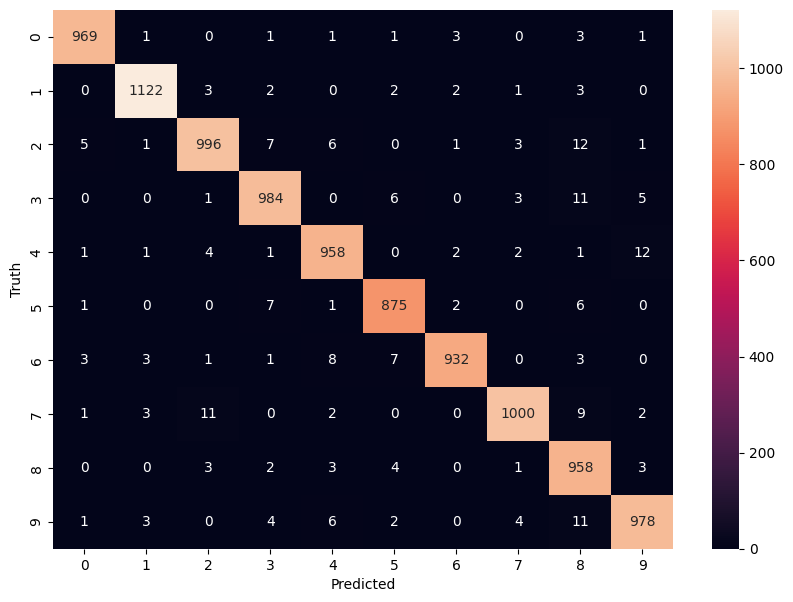

In [ ]:
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(250, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2266 - accuracy: 0.9338
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0920 - accuracy: 0.9722
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0610 - accuracy: 0.9813
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0440 - accuracy: 0.9860
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0342 - accuracy: 0.9891
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0253 - accuracy: 0.9922
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0201 - accuracy: 0.9937
Epoch 8/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0161 - accuracy: 0.9948
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0140 - accuracy: 0.9953
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.01

313/313 [==============================] - 1s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

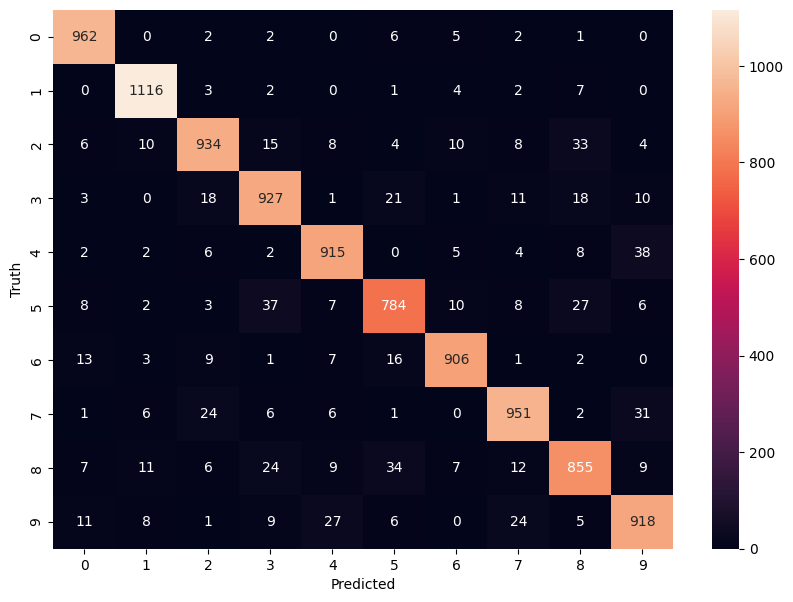

In [ ]:
Y_predicted = model.predict(X_test_flattened)
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
cm = tf.math.confusion_matrix(labels=Y_test, predictions=Y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(250, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 2.7856 - accuracy: 0.8953
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3556 - accuracy: 0.9285
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2929 - accuracy: 0.9355
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2594 - accuracy: 0.9419
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2430 - accuracy: 0.9473
